# Internet Marketing Project

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from scipy import stats

In [276]:
data = pd.read_excel('DoubleClickData.xls')

In [277]:
print(data.columns.values)

['Publisher ID' 'Publisher Name' 'Keyword ID' 'Keyword' 'Match Type'
 'Campaign' 'Keyword Group' 'Category' 'Bid Strategy' 'Keyword Type'
 'Status' 'Search Engine Bid' 'Clicks' 'Click Charges'
 'Avg. Cost per Click' 'Impressions' 'Engine Click Thru %' 'Avg. Pos.'
 'Trans. Conv. %' 'Total Cost/ Trans.' 'Amount' 'Total Cost'
 'Total Volume of Bookings']


In [278]:
data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher ID              4510 non-null   object 
 1   Publisher Name            4510 non-null   object 
 2   Keyword ID                4510 non-null   int64  
 3   Keyword                   4510 non-null   object 
 4   Match Type                4462 non-null   object 
 5   Campaign                  4510 non-null   object 
 6   Keyword Group             4510 non-null   object 
 7   Category                  4510 non-null   object 
 8   Bid Strategy              3286 non-null   object 
 9   Keyword Type              4510 non-null   object 
 10  Status                    4510 non-null   object 
 11  Search Engine Bid         4510 non-null   float64
 12  Clicks                    4510 non-null   int64  
 13  Click Charges             4510 non-null   float64
 14  Avg. Cos

In [280]:
data['Net Revenue'] = data['Amount']-data['Total Cost']

In [281]:
data['Probability of Booking'] = data['Engine Click Thru %']*data['Trans. Conv. %']/10000

In [282]:
data.loc[data['Total Cost'] == 0, 'ROA'] = 0
data.loc[data['Total Cost'] != 0, 'ROA'] = data['Net Revenue']/data['Total Cost']*100

In [283]:
data['ROA'].head()

0    379487.027027
1    251772.000000
2    100583.870968
3     71906.491546
4     42400.000000
Name: ROA, dtype: float64

In [284]:
data.loc[data['Total Volume of Bookings'] == 0, 'Avg Revenue per Booking'] = None
data.loc[data['Total Volume of Bookings'] != 0, 'Avg Revenue per Booking'] = data['Amount']/data['Total Volume of Bookings']

In [285]:
data['Avg Revenue per Booking']

0        975.327778
1       1574.200000
2        390.150000
3        832.575000
4        935.000000
           ...     
4505            NaN
4506            NaN
4507            NaN
4508            NaN
4509            NaN
Name: Avg Revenue per Booking, Length: 4510, dtype: float64

In [286]:
data['Avg Revenue per Booking'].isnull().count()

4510

In [287]:
data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Probability of Booking,ROA,Avg Revenue per Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,0.818182,379487.027027,975.327778
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,0.166667,251772.000000,1574.200000
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,0.111111,100583.870968,390.150000
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,0.004988,71906.491546,832.575000
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,0.003145,42400.000000,935.000000


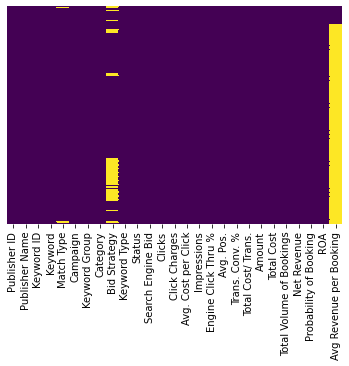

In [288]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

### Exploratory Analysis

In [289]:
data[["Engine Click Thru %", "Trans. Conv. %", "Net Revenue", "Avg. Cost per Click", "ROA", "Avg Revenue per Booking", "Probability of Booking"]].describe()

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,ROA,Avg Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
mean,11.141451,0.569255,866.207678,1.890240,341.413864,1024.259502,0.000681
std,20.234582,13.862485,14246.298903,1.322375,7277.915278,704.318741,0.015151
min,0.000000,0.000000,-8725.924987,0.000000,-100.000000,34.000000,0.000000
25%,1.531681,0.000000,-18.871875,0.825000,-100.000000,562.912500,0.000000
50%,4.105614,0.000000,-4.987500,1.650493,-100.000000,899.725000,0.000000
75%,10.916928,0.000000,-1.600000,2.662500,-100.000000,1277.975000,0.000000
max,200.000000,900.000000,549524.050273,10.000000,379487.027027,5877.750000,0.818182


This statistical summary highlights that 75% of our Net Revenue data is -1.60. 25% of our Net Revenue data is -18.87. Therefore, we can infer that publishers are overall experiencing losses. The standard deviation of the Net Revenue data is 14246.30, which is almost double of our mean. This suggests that data is widely distributed. 

The Average Revenue per Booking is 1024.23, which is an overall gain for the publishers. The Average Probability of Booking is 0.007%, which is very low. The highest probability of booking is about 0.818%. It would be beneficial for the publishers to look closer at why the probability of booking is low. This insight will guide them to increase their performance. 

The Average Cost per Click is 1.89, which is low compared to the max of 10.00 however not far off from the majority of the transactions, 75% of which are less than 2.66. This average cost of clicks should be a focus point for marketers to reduce. The mean is slightly higher than the median, which means that data distribution is skewed. 

The Average Engine Click Thru % is 11.14, which is only slightly above the 75% percentile marker of 10.92. The standard deviation is higher than the mean, which suggests that data is widely distributed. Since the mean is almost double of the median, data is skewed.

From looking at this data and comparing the mean against the percentiles and maximum values, it looks like we might have some outliers in Engine Click Thru %, Trans. Conv %, and Avg. Cost per Click.


C:\Users\ferna\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


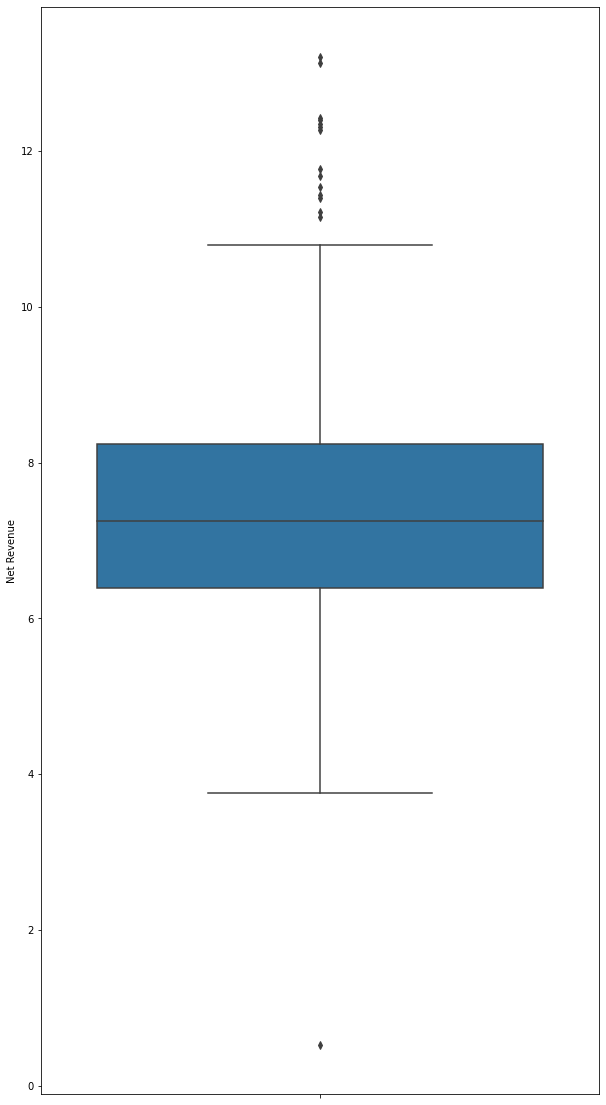

In [290]:
plt.figure(figsize = (10,20))
a = np.log(data['Net Revenue']) 
    # We calculate log of Net Revenue to visualize the distribution of our data 
    # We do not use log of Net Revenue in any other calcualtions of our project
sns.boxplot(y=a, data = data)

Net Revenue has a significant number of outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13C258D90>]],
      dtype=object)

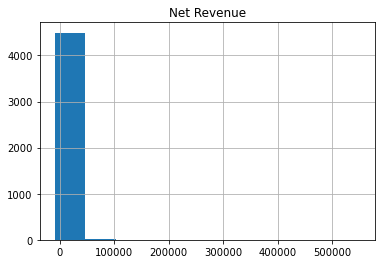

In [291]:
data.hist('Net Revenue')

A great part of Net Revenue falls into the range of 0 and 100000

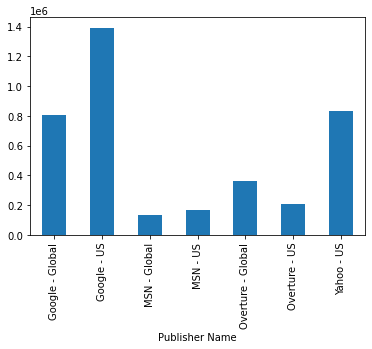

In [292]:
data.groupby('Publisher Name')['Net Revenue'].sum().plot(kind='bar')

Google - US has the most amount of Net Revenue. MSN - Global has the least amount of Net Revenue.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13C371820>]],
      dtype=object)

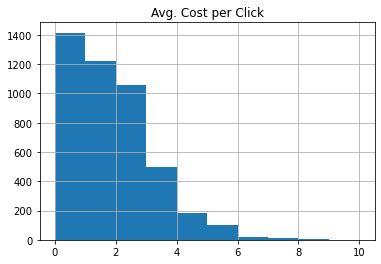

In [293]:
data.hist('Avg. Cost per Click')

The lower number of clicks, the higher the cost per click. One click is the most common observation.

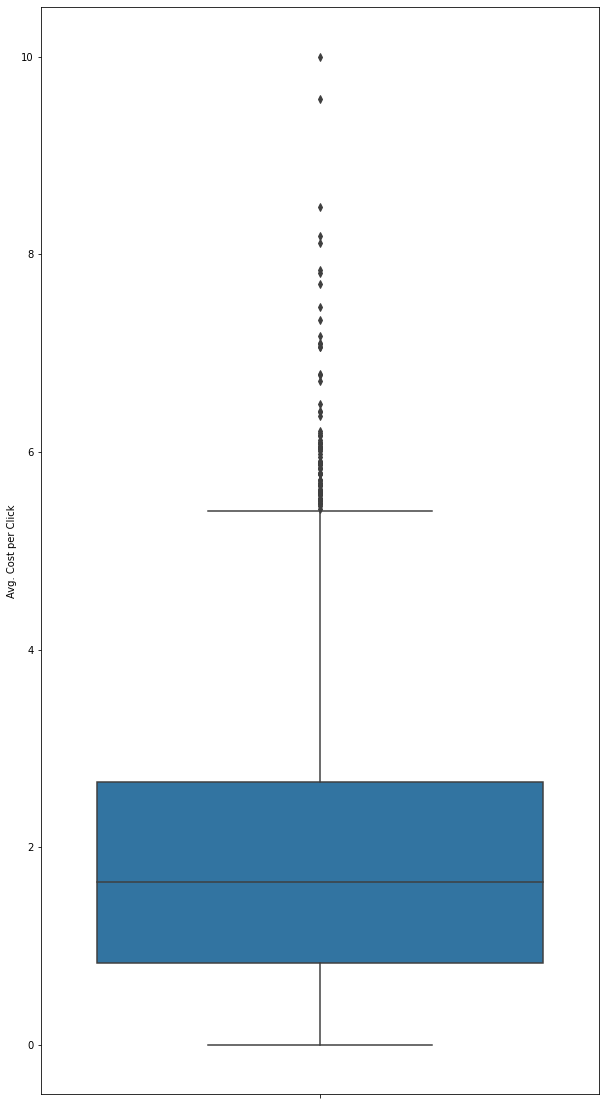

In [294]:
plt.figure(figsize=(10,20))  
sns.boxplot(y= data['Avg. Cost per Click']) 

Avg. Cost per click has a significant number of outliers.

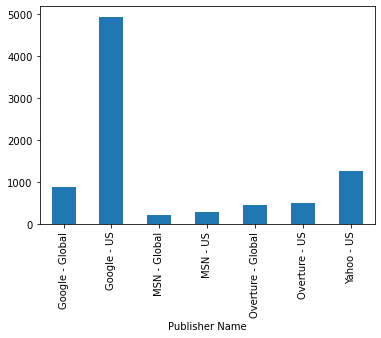

In [295]:
data.groupby('Publisher Name')['Avg. Cost per Click'].sum().plot(kind='bar')

Google - US has the highest average cost per click. MSN - Global has the lowest average cost per click. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13CEE4D30>]],
      dtype=object)

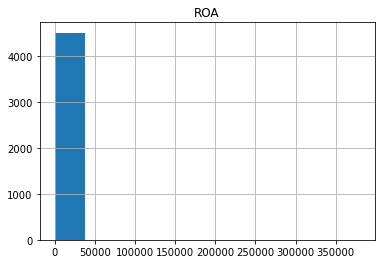

In [296]:
data.hist('ROA')

Data for ROA is concentrated in the range of 0 and 500. 

C:\Users\ferna\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ferna\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


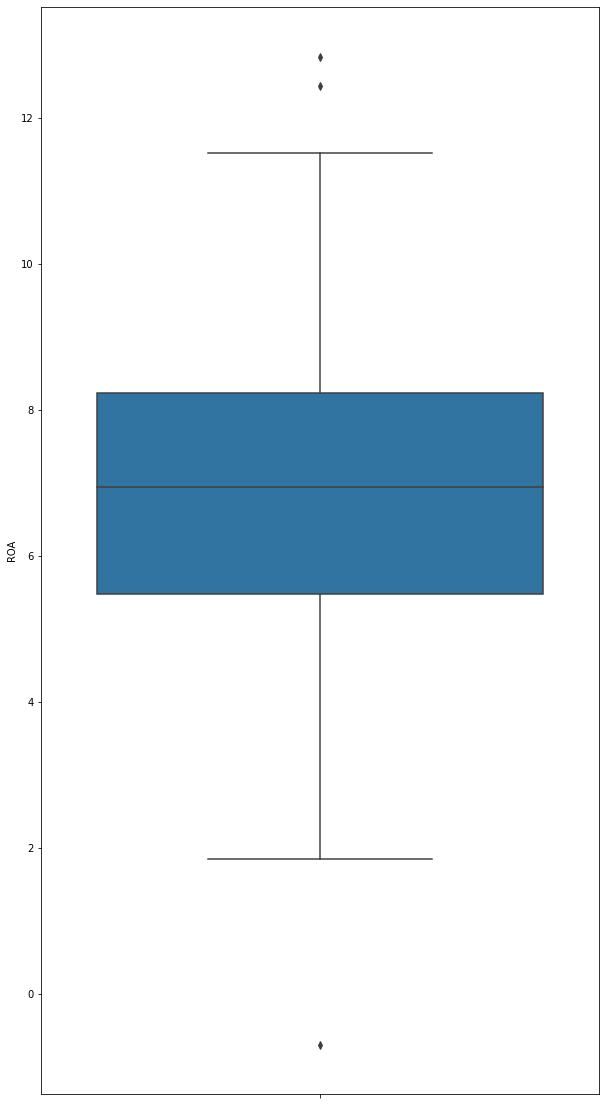

In [297]:
plt.figure(figsize=(10,20))  
a= np.log(data['ROA'])
    # We calculate log of ROA to visualize the distribution of our data 
    # We do not use log of ROA in any other calcualtions of our project
sns.boxplot(y= a, data = data) 


ROA has few outliers. There is a slightly greater number of ROA observations on the lower quartile. 

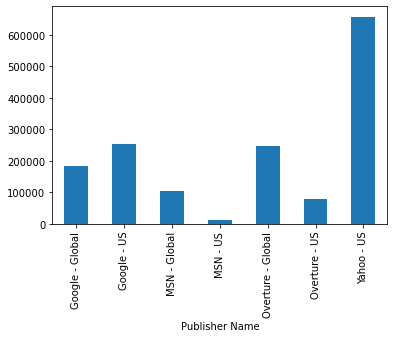

In [298]:
data.groupby('Publisher Name')['ROA'].sum().plot(kind='bar')

Yahoo - US has the most ROA. MSN - US has the lowest ROA. 

In [299]:
data['Avg Revenue per Booking'].head()

0     975.327778
1    1574.200000
2     390.150000
3     832.575000
4     935.000000
Name: Avg Revenue per Booking, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13E2A38B0>]],
      dtype=object)

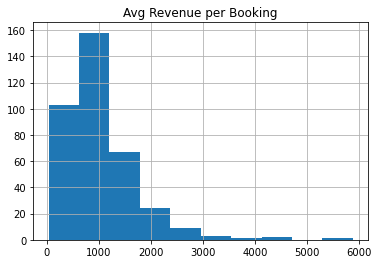

In [300]:
data.hist('Avg Revenue per Booking')

Average Revenue per Booking is mainly within the range of 500 - 1000.

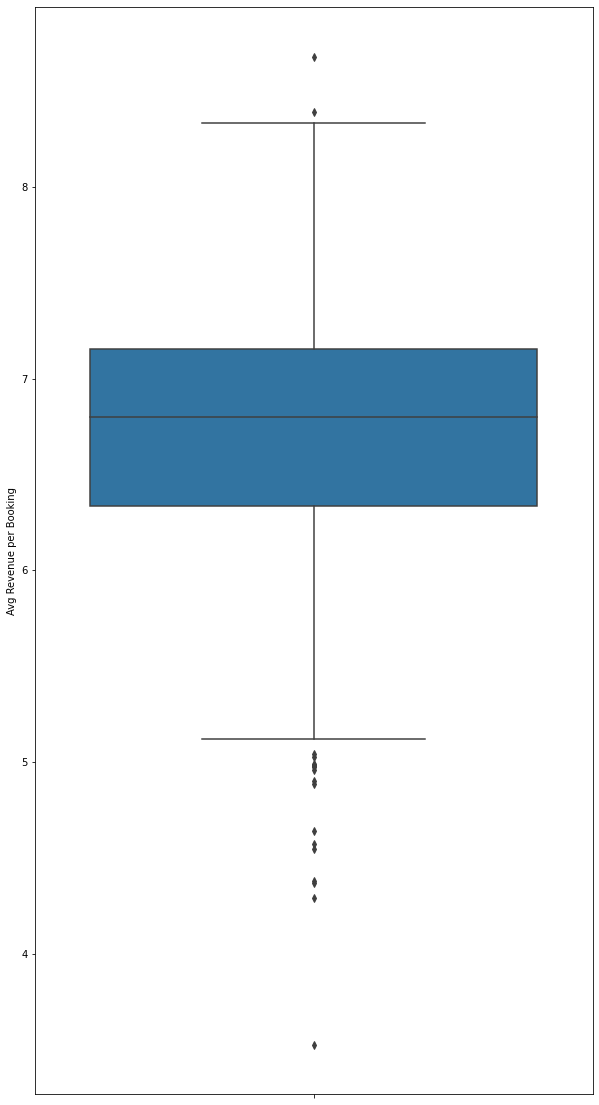

In [301]:
plt.figure(figsize=(10,20))  
a= np.log(data['Avg Revenue per Booking'])
    # We calculate log of Avg Revenue per Booking to visualize the distribution of our data 
    # We do not use log of Avg Revenue per Booking in any other calcualtions of our project
sns.boxplot(y= a, data = data) 

Average Revenue per Booking has a considerable number of outliers. Data is distributed slightly more towards the lower quartile. 

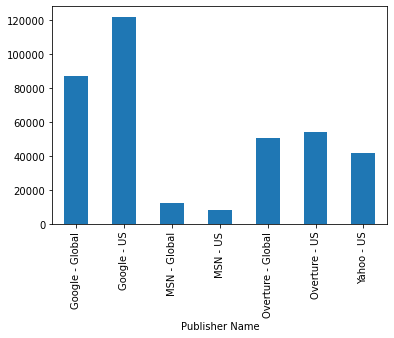

In [302]:
data.groupby('Publisher Name')['Avg Revenue per Booking'].sum().plot(kind='bar')

Google - US has the most Average Revenue per Booking. MSN - US has the lowest Average Revenue per Booking.

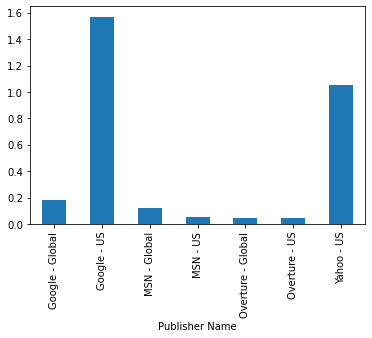

In [303]:
data.groupby('Publisher Name')['Probability of Booking'].sum().plot(kind='bar')

Google - US has highest probability of booking. The lowest probability of booking seems to be Overture - US.

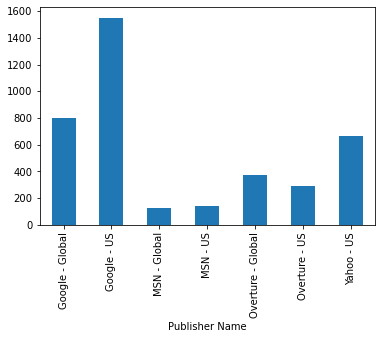

In [304]:
data.groupby('Publisher Name')['Total Volume of Bookings'].sum().plot(kind='bar')

Google - US has the highest volume of bookings. MSN - Global has the lowest volume of bookings.

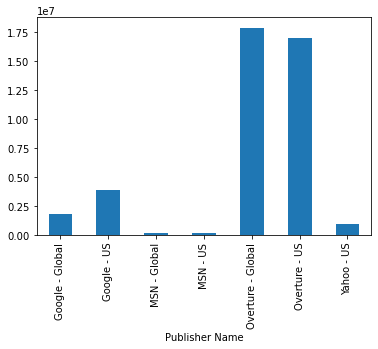

In [305]:
data.groupby('Publisher Name')['Impressions'].sum().plot(kind='bar')

Overture - Global has the highest number of impressions. MSN - US seems to have the lowest number of impressions.

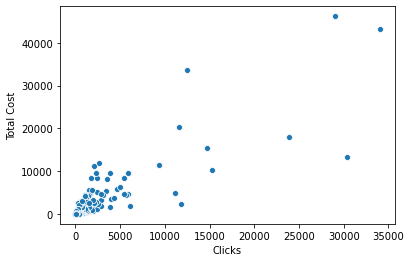

In [306]:
y = 'Total Cost'
x = 'Clicks'
sns.scatterplot(x,y,data= data)

There is a potential positive relationship between Total Cost and Clicks. 

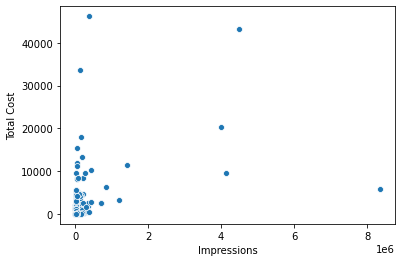

In [307]:
y = 'Total Cost'
x = 'Impressions'
sns.scatterplot(x,y,data= data)

There is a slight potential positive relationship between Impressions and Total Costs. There are plenty outliers.

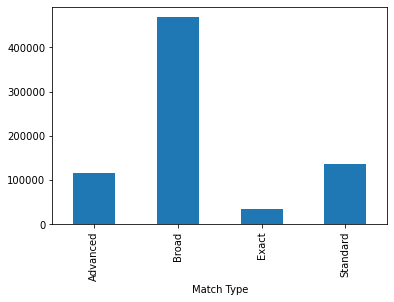

In [308]:
data.groupby('Match Type')['Total Cost'].sum().plot(kind='bar')

The most popular type of match used is broad. The least type of match used is exact.

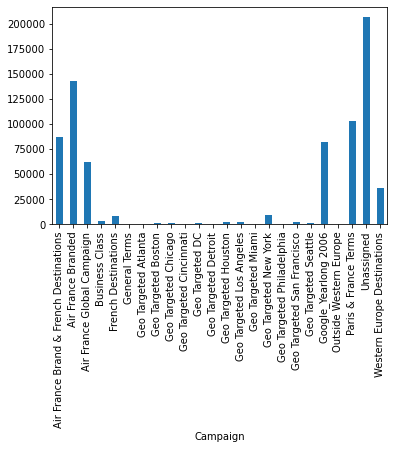

In [309]:
data.groupby('Campaign')['Total Cost'].sum().plot(kind='bar')

After the unassigned campaigns, the highest cost of campaign is Air France Branded. 

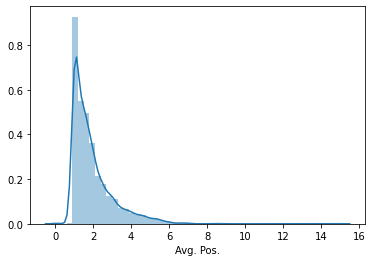

In [310]:
sns.distplot(data['Avg. Pos.'])

The data for average position of ads is skewed to the left, which means that the mean is higher than the median. 

## Data Cleaning

In [311]:
data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Probability of Booking,ROA,Avg Revenue per Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,0.818182,379487.027027,975.327778
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,0.166667,251772.000000,1574.200000
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,0.111111,100583.870968,390.150000
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,0.004988,71906.491546,832.575000
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,0.003145,42400.000000,935.000000


In [312]:
data.loc[data['Match Type'] == 'Broad', 'match_dum'] = 1
data.loc[data['Match Type'] != 'Broad', 'match_dum'] = 0

# Bar chart shows that broad is the most popular type of match used

In [313]:
data.loc[data['Publisher Name'] == 'Google - US', 'pub_dum'] = 1
data.loc[data['Publisher Name'] != 'Google - US', 'pub_dum'] = 0

# Bar chart shows that Google - US is the most popular publisher used

In [314]:
data.loc[data['Campaign'] == 'Air France Branded', 'camp_dum'] = 1
data.loc[data['Campaign'] != 'Air France Branded', 'camp_dum'] = 0

# Bar chart shows that Air France Branded is the campaign that costs the most

In [315]:
sdata = pd.pivot_table(data,values='Total Cost',index='Keyword',columns=None,aggfunc=np.sum,dropna=True)

In [316]:
sdata.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Keyword,
air france,85736.637032
airline ticket,64279.162309
flight to paris,49413.662420
airfrance,33584.024589
[air france],33552.649629
france travel,29091.499934
paris travel,22876.974957
flights to paris,15917.124957
europe travel,13212.624973


In [317]:
data.loc[data['Keyword'] == 'air france', 'keyword_dum'] = 1
data.loc[data['Keyword'] != 'air france', 'keyword_dum'] = 0

In [318]:
sdata1 = pd.pivot_table(data,values='Total Cost',index='Keyword Group',columns=None,aggfunc=np.sum,dropna=True)

In [319]:
sdata1.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Keyword Group,
Unassigned,206271.936599
Air France Brand,113652.724276
Paris,99833.149729
France,89933.974845
Air France Website,75261.999489
Google|Flights Relaunch,14126.787477
Google|Spain,12898.774968
Google|Europe,10227.112478
Air France,8951.949875


In [320]:
data.loc[data['Keyword Group'] == 'Air France Brand', 'keygroup_dum'] = 1
data.loc[data['Keyword Group'] != 'Air France Brand', 'keygroup_dum'] = 0

In [321]:
sdata2 = pd.pivot_table(data,values='Total Cost',index='Category',columns=None,aggfunc=np.sum,dropna=True)

In [322]:
sdata2.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Category,
uncategorized,478257.710612
airline,64033.424812
france,40797.162397
paris,34811.774881
airfrance,27996.774681
flight,18166.099915
europe2,15563.187468
airfaregeneral,12834.962459
discount,7577.737467


In [323]:
data.loc[data['Category'] == 'airline', 'cat_dum'] = 1
data.loc[data['Category'] != 'airline', 'cat_dum'] = 0

In [324]:
sdata3 = pd.pivot_table(data,values='Total Cost',index='Bid Strategy',columns=None,aggfunc=np.sum,dropna=True)

In [325]:
sdata3.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Bid Strategy,
Position 5-10 Bid Strategy,172972.562012
Position 1-4 Bid Strategy,128886.324516
Postiion 1-4 Bid Strategy,66677.499828
Position 1- 3,58697.299770
Pos 3-6,45965.837416
Position 1-2 Target,23761.424779
Position 2-5 Bid Strategy,11568.724968
Position 1 -2 Target,5296.287468


In [326]:
data.loc[data['Bid Strategy'] == 'Position 5-10 Bid Strategy', 'bids_dum'] = 1
data.loc[data['Bid Strategy'] != 'Position 5-10 Bid Strategy', 'bids_dum'] = 0

In [327]:
sdata4 = pd.pivot_table(data,values='Total Cost',index='Keyword Type',columns=None,aggfunc=np.sum,dropna=True)

In [328]:
sdata4.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Keyword Type,
Unassigned,755315.921956


In [329]:
sdata5 = pd.pivot_table(data,values='Total Cost',index='Status',columns=None,aggfunc=np.sum,dropna=True)

In [330]:
sdata5.sort_values(by = 'Total Cost',ascending = False).nlargest(10,'Total Cost')

,Total Cost
Status,
Paused,272422.999171
Unavailable,267370.461537
Live,181575.548916
Sent,21786.549894
Deactivated,12160.362438


In [331]:
data.loc[data['Status'] == 'Paused', 'status_dum'] = 1
data.loc[data['Status'] != 'Paused', 'status_dum'] = 0

In [332]:
data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,ROA,Avg Revenue per Booking,match_dum,pub_dum,camp_dum,keyword_dum,keygroup_dum,cat_dum,bids_dum,status_dum
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,379487.027027,975.327778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,251772.000000,1574.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,100583.870968,390.150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,71906.491546,832.575000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,42400.000000,935.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [333]:
data.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Probability of Booking', 'ROA', 'Avg Revenue per Booking', 'match_dum',
       'pub_dum', 'camp_dum', 'keyword_dum', 'keygroup_dum', 'cat_dum',
       'bids_dum', 'status_dum'],
      dtype='object')

In [334]:
data.drop(['Category','Match Type', 'Campaign','Publisher Name','Publisher ID','Keyword ID','Keyword','Keyword Group','Bid Strategy','Keyword Type','Status','Avg Revenue per Booking'], axis = 1, inplace = True)

In [335]:
data.head()

,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,...,Probability of Booking,ROA,match_dum,pub_dum,camp_dum,keyword_dum,keygroup_dum,cat_dum,bids_dum,status_dum
0,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,...,0.818182,379487.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,...,0.166667,251772.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,...,0.111111,100583.870968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,...,0.004988,71906.491546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,...,0.003145,42400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


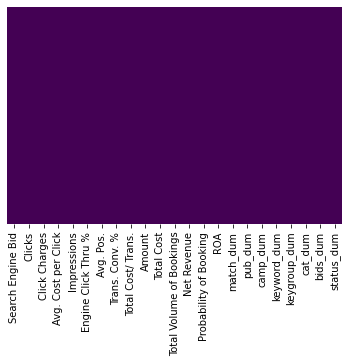

In [336]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

## Multicolinearity issue 

In [337]:
x = data.drop(['Total Cost'], axis=1)

In [338]:
x.columns

Index(['Search Engine Bid', 'Clicks', 'Click Charges', 'Avg. Cost per Click',
       'Impressions', 'Engine Click Thru %', 'Avg. Pos.', 'Trans. Conv. %',
       'Total Cost/ Trans.', 'Amount', 'Total Volume of Bookings',
       'Net Revenue', 'Probability of Booking', 'ROA', 'match_dum', 'pub_dum',
       'camp_dum', 'keyword_dum', 'keygroup_dum', 'cat_dum', 'bids_dum',
       'status_dum'],
      dtype='object')

In [339]:
dcor = x.corr()
dcor

,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,...,Probability of Booking,ROA,match_dum,pub_dum,camp_dum,keyword_dum,keygroup_dum,cat_dum,bids_dum,status_dum
Search Engine Bid,1.000000,0.114934,0.113212,0.280368,0.023738,0.147721,-0.267877,0.002874,0.039652,0.107165,...,0.008993,-0.005297,0.263215,0.366561,0.135378,0.051558,-0.016651,-0.021807,0.011497,-0.071618
Clicks,0.114934,1.000000,0.868330,-0.033787,0.400361,-0.014000,-0.021096,0.001533,0.192615,0.830764,...,0.002635,0.015593,-0.027534,-0.018170,0.223024,0.310210,0.202267,0.180153,-0.072921,-0.055217
Click Charges,0.113212,0.868330,1.000000,0.029171,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,...,-0.000769,0.003013,0.011518,0.002254,0.171297,0.311790,0.146510,0.198898,-0.065040,-0.051535
Avg. Cost per Click,0.280368,-0.033787,0.029171,1.000000,-0.016912,0.106898,-0.113344,0.003308,0.058178,-0.047568,...,0.004340,-0.033836,0.446351,0.344067,-0.094192,-0.023248,-0.049599,0.002358,0.146492,-0.088568
Impressions,0.023738,0.400361,0.431231,-0.016912,1.000000,-0.026821,-0.005288,-0.001338,0.201258,0.104770,...,-0.002120,-0.000827,-0.050687,-0.040313,0.006065,0.029018,0.004310,0.214128,-0.044665,-0.026003
Engine Click Thru %,0.147721,-0.014000,-0.027310,0.106898,-0.026821,1.000000,-0.221802,0.001666,-0.040646,0.008413,...,0.028059,0.000861,0.158880,0.179824,0.012107,-0.005405,0.001013,-0.026151,0.086530,-0.069355
Avg. Pos.,-0.267877,-0.021096,-0.018533,-0.113344,-0.005288,-0.221802,1.000000,-0.013475,-0.012189,-0.030424,...,-0.024613,-0.024858,-0.144299,-0.040130,-0.078017,-0.022521,-0.063363,0.029691,0.122268,0.078900
Trans. Conv. %,0.002874,0.001533,-0.000401,0.003308,-0.001338,0.001666,-0.013475,1.000000,-0.000528,0.014417,...,0.889333,0.856458,-0.008830,-0.010268,0.011584,0.001267,0.006289,-0.000074,-0.019437,-0.025681
Total Cost/ Trans.,0.039652,0.192615,0.333614,0.058178,0.201258,-0.040646,-0.012189,-0.000528,1.000000,0.035870,...,-0.002432,-0.002331,0.019405,-0.010142,0.010681,0.017557,0.015127,0.027309,-0.086013,-0.032453
Amount,0.107165,0.830764,0.549963,-0.047568,0.104770,0.008413,-0.030424,0.014417,0.035870,1.000000,...,0.015723,0.037796,-0.020979,-0.011773,0.267516,0.285619,0.220949,0.032033,-0.064020,-0.057116


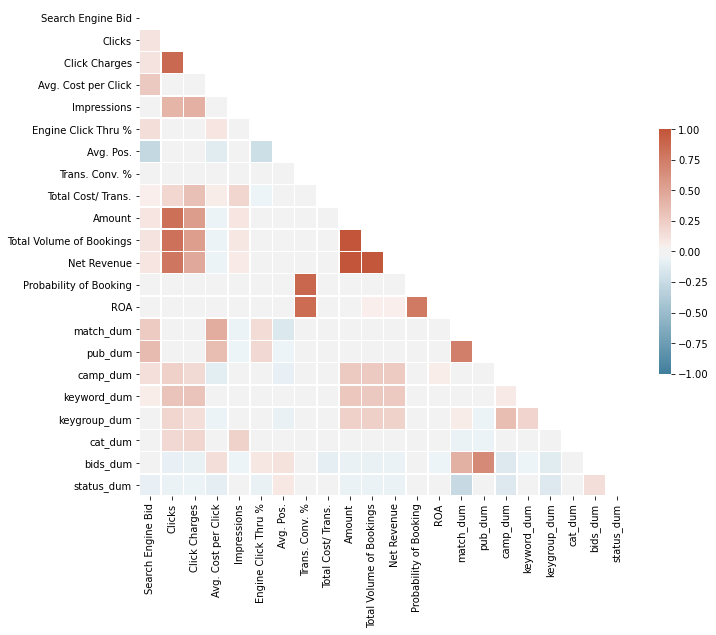

In [340]:
dcor = x.corr()

mask = np.triu(np.ones_like(dcor, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dcor, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Most of our variables are not correlated with each other, which is beneficial to our analysis as each variable provides a unique perspective. 
When variables have a correlational coefficient greater than or equal to 0.80, they are usually considered strongly correlated. The following variables have correlational coefficients greater or equal to 0.80:

-Click Charges and Clicks

-Amount and Clicks

-Total Volume of Booking and Clicks

-Net Revenue and Clicks

-Trans. Conv % with Return on Ad  

-Trans. Conv % with Probability of Booking 

-Amount and Total Volume of Bookings

-Net Revenue and Amount

-Net Revenue and Total Volume of Bookings


In [341]:
ivs=data[['Impressions','Clicks','Trans. Conv. %', 'Avg. Pos.', 'Total Volume of Bookings','Probability of Booking','match_dum','pub_dum','camp_dum','keyword_dum','keygroup_dum','cat_dum','bids_dum','status_dum']]


In [342]:
ivs

,Impressions,Clicks,Trans. Conv. %,Avg. Pos.,Total Volume of Bookings,Probability of Booking,match_dum,pub_dum,camp_dum,keyword_dum,keygroup_dum,cat_dum,bids_dum,status_dum
0,11,1,900.000000,1.272727,9,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1,100.000000,1.000000,1,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9,1,100.000000,1.111111,1,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,401,59,3.389831,2.000000,2,0.004988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,318,8,12.500000,2.975786,1,0.003145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,154,10,0.000000,1.183117,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4506,178,12,0.000000,1.071910,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4507,213,14,0.000000,1.308920,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4508,386,22,0.000000,1.661140,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(ivs.values, i) for i in range(ivs.shape[1])]
vif['Variables'] = ivs.columns

In [344]:
vif['VIF']

0     1.545985
1     5.221115
2     4.800386
3     2.559130
4     4.276550
5     4.802101
6     4.634093
7     6.294649
8     1.245148
9     1.154698
10    1.250266
11    1.103863
12    3.965733
13    2.041628
Name: VIF, dtype: float64

In [345]:
vif['Variables']

0                  Impressions
1                       Clicks
2               Trans. Conv. %
3                    Avg. Pos.
4     Total Volume of Bookings
5       Probability of Booking
6                    match_dum
7                      pub_dum
8                     camp_dum
9                  keyword_dum
10                keygroup_dum
11                     cat_dum
12                    bids_dum
13                  status_dum
Name: Variables, dtype: object

### Regression Equation

Determine what factors influence total cost 

In [346]:
import statsmodels.api as sm

In [347]:
data.columns

Index(['Search Engine Bid', 'Clicks', 'Click Charges', 'Avg. Cost per Click',
       'Impressions', 'Engine Click Thru %', 'Avg. Pos.', 'Trans. Conv. %',
       'Total Cost/ Trans.', 'Amount', 'Total Cost',
       'Total Volume of Bookings', 'Net Revenue', 'Probability of Booking',
       'ROA', 'match_dum', 'pub_dum', 'camp_dum', 'keyword_dum',
       'keygroup_dum', 'cat_dum', 'bids_dum', 'status_dum'],
      dtype='object')

In [348]:
new_indepvar=sm.add_constant(data[['Impressions','Clicks','Trans. Conv. %', 'Avg. Pos.', 'Total Volume of Bookings','Probability of Booking','match_dum','pub_dum','camp_dum','keyword_dum','keygroup_dum','cat_dum','bids_dum','status_dum']])

In [349]:
#create the model
#Total Cost is DV
mod=sm.OLS(data["Total Cost"],new_indepvar)

In [350]:
# fit data into the model
res=mod.fit()

In [351]:
#print out result summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2053.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        19:36:29   Log-Likelihood:                -34369.
No. Observations:                4510   AIC:                         6.877e+04
Df Residuals:                    4495   BIC:                         6.886e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Total Cost = -0.0005 Impressions +  1.7756 Clicks -70.4944 Total Volume of Bookings + 130.5588 match_dum + 326.4621 camp_dum + 1616.1791 keyword_dum -582.3154 cat_dum -64.8467 bids_dum


Interpretation of Results:

Impressions has a negative weak relationship with Total Cost. When there is one more impression, total cost will slightly decrease. This could be because impressions could be sold in bulk. This could cause a very loose decrease in total cost for the provider. 

Clicks has a positive relationship with Total Cost. When there is one more click, the total cost will increase. If the advertiser is only paying for the ads that were clicked, the total cost could slightly increase for the publisher. 
o	Total Volume of Bookings has strong negative relationship with Total Cost. When the volume of bookings increases by one unit, the total cost will decrease by 70. This is likely due to bulk purchases that often include a discount in total price paid to the advertiser.

Type of match (match_dum) has a strong positive relationship with Total Cost. When the type of match is broad, the total cost will increase by $130. This indicates it is more expensive for the advertiser to use a broad word search on advertisements. Even though a lot of people may click on the advertisement, it will not produce the desired results because the click will not compare to the specific transaction.

Campaign has a strong positive relationship with Total Cost. When campaign is Air France branded, the total cost will increase by $296.51. This could be due to the fact that when a customer clicks directly on an Air France advertisement making it a more efficient transaction but more costly for advertisers who are paying based on the ads that are clicked.

Keyword: Keyword has a strong positive relationship with total cost. When the keyword is “Air France”, the total cost will increase by about $1616.18. This could be due to the fact that purchasers are routed more directly to the page/transaction they are looking for. Similar to the Campaign variable above, although it is cost effective for the purchaser, it is more costly for the advertisers who pay based on clicked ads, which are reduced when there is a more direct pathway.

Category: has a strong negative relationship with total cost. When the category is “Airline”, the total cost will decrease about $582.32. Based on the bar chart results in the exploratory data analysis, we can see that because Airline is an “exact” term, price will decrease dramatically.

Bids has a strong negative relationship with total cost. When the bid is “Position 5-10 Bid Strategy”, the total cost will decrease by about $64.85. The total cost will decrease because the advertisement is less likely to be clicked in comparison to the advertisements in the 1st through 4th position.


Keyword, Category and Campaign are the best predictors of total cost because the magnitude of all of them is greater than 300.


Suggestion: We suggest that Air France use Google to increase their share in the competitive US markets because Google performed the best of all providers. We recommend that their strategy should be to have a key word of “Air France”, a category of “Airlines” and advertisements populating in a bid position between 5 and 10.

